## 크롤리 핵심 코드 패턴

In [1]:
import requests
from bs4 import BeautifulSoup

In [12]:
# 웹페이지 가져오기
res = requests.get('https://newsis.com/view/?id=NISX20220323_0001804413&cID=10503&pID=10500')
print(res)
print(res.content)

<Response [200]>
b'<html lang="ko" class="ko">\r\n    <head itemscope>\r\n        <meta charset="utf-8">\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n\t\t<meta name="viewport"  content="width=1280">\r\n        <meta name="robots" content="max-image-preview:large, max-video-preview:0">\r\n        <meta itemprop="inLanguage" content="ko_KR" />\r\n\t\t<meta name="google-site-verification" content="icDz6oxWxwp9SSur9h4ISnZKbIi12T4RkAD2UtEI_cw" />\r\n\t\t<meta name="naver-site-verification" content="a41d14500de6ed44d227cd993106a7e8a1f2a081"/>\r\n\t\t<meta property="fb:app_id" content="" /> \r\n\t\t<meta property="og:title" content="\xec\x86\x90\xed\x9d\xa5\xeb\xaf\xbc &quot;\xeb\x82\xa8\xec\x9d\x80 2\xec\x97\xb0\xec\xa0\x84, \xec\x9b\x94\xeb\x93\x9c\xec\xbb\xb5 \xed\x99\x95\xec\xa0\x95 \xeb\xaa\xbb\xed\x95\x9c \xed\x8c\x80\xec\xb2\x98\xeb\x9f\xbc \xeb\x9b\xb8 \xea\xb2\x83&quot;" />\r\n\t\t<meta property="og:type" content="website" /> \r\n\t\t<meta property="og:image" c

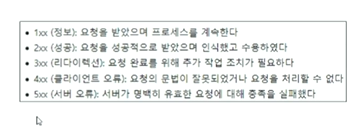

In [15]:
# 웹페이지 파싱하기
soup = BeautifulSoup(res.content,'html.parser')
soup

<html class="ko" lang="ko">
<head itemscope="">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1280" name="viewport"/>
<meta content="max-image-preview:large, max-video-preview:0" name="robots"/>
<meta content="ko_KR" itemprop="inLanguage">
<meta content="icDz6oxWxwp9SSur9h4ISnZKbIi12T4RkAD2UtEI_cw" name="google-site-verification">
<meta content="a41d14500de6ed44d227cd993106a7e8a1f2a081" name="naver-site-verification">
<meta content="" property="fb:app_id">
<meta content='손흥민 "남은 2연전, 월드컵 확정 못한 팀처럼 뛸 것"' property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="http://image.newsis.com/2022/03/22/NISI20220322_0018620920_web.jpg" property="og:image"/>
<meta content="newsis" property="og:site_name"/>
<meta content="https://www.newsis.com/view/?id=NISX20220323_0001804413" property="og:url"/>
<meta content="스포츠" property="article:section"/>
<meta content="축구" property="article:section2"/>
<meta content="2022-03-23T

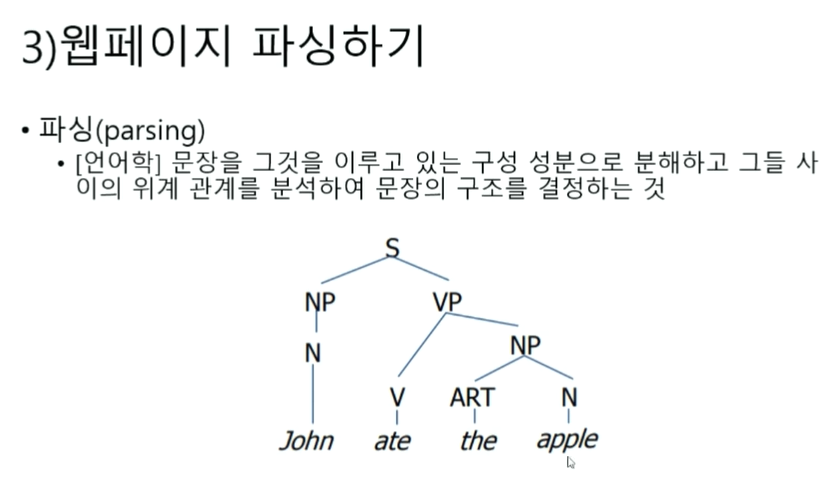

In [18]:
# 타이틀 가져오기
mydata = soup.find('title')

In [19]:
print(mydata.get_text())

 손흥민 "남은 2연전, 월드컵 확정 못한 팀처럼 뛸 것" :: 공감언론 뉴시스통신사 :: 


## 웹문서 간단히 만들어보기

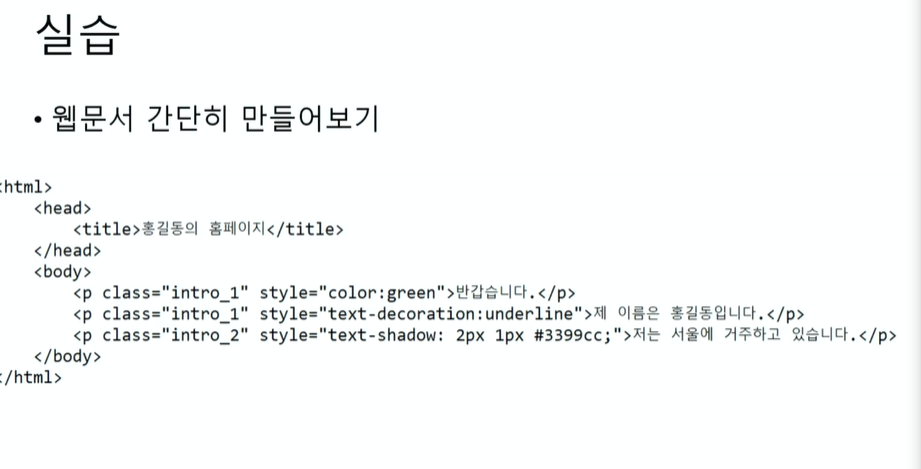

In [20]:
text = '''
<html>
    <head>
        <title>윤민혁의 홈페이지</title>
    </head>
    <body>
        <p class="intro_1" style="color: green">반갑습니다.</p>
        <p class="intro_1" style="text-decoration: underline;">제 이름은 윤민혁입니다.</p>
        <p class="intro_2" style="text-shadow: 2px 1px #3399cc;">저는 서울에 거주하고 있습니다</p>
    </body>
</html>
'''


In [21]:
soup = BeautifulSoup(text, 'html.parser')
soup


<html>
<head>
<title>윤민혁의 홈페이지</title>
</head>
<body>
<p class="intro_1" style="color: green">반갑습니다.</p>
<p class="intro_1" style="text-decoration: underline;">제 이름은 윤민혁입니다.</p>
<p class="intro_2" style="text-shadow: 2px 1px #3399cc;">저는 서울에 거주하고 있습니다</p>
</body>
</html>

In [23]:
mydata = soup.find('title')
print(mydata.get_text())

윤민혁의 홈페이지


In [25]:
# 첫번째 p태그만 가져옴
mydata = soup.find('p')
print(mydata.get_text())

반갑습니다.


In [30]:
# 모든 p태그를 가져옴
mydata = soup.find_all('p')
for i in mydata: 
    print(i.get_text())

반갑습니다.
제 이름은 윤민혁입니다.
저는 서울에 거주하고 있습니다


In [31]:
mydata

[<p class="intro_1" style="color: green">반갑습니다.</p>,
 <p class="intro_1" style="text-decoration: underline;">제 이름은 윤민혁입니다.</p>,
 <p class="intro_2" style="text-shadow: 2px 1px #3399cc;">저는 서울에 거주하고 있습니다</p>]

In [32]:
# 2번쨰 p태그만 추출
mydata[1].get_text()

'제 이름은 윤민혁입니다.'

In [34]:
# 클래스명을 통해 추출
mydata = soup.find('p','intro_2')
print(mydata.get_text())

저는 서울에 거주하고 있습니다


In [39]:
res = requests.get('https://sports.news.naver.com/news.nhn?oid=003&aid=0011079116')
res

<Response [200]>

In [40]:
soup = BeautifulSoup(res.content,'html.parser')

In [46]:
# 띄어쓰기 이후에는 인식을 하지 않음 클래스의 경우 공백뒤로는 지우고 추출
mydata = soup.find('div','news_end')

In [49]:
mydata

<div class="news_end" id="newsEndContents">
<div style="width:100%; padding:10px 30px; margin-bottom:20px; box-sizing:border-box; line-height:28px; border:1px solid #ca7f8d;"><strong style="color:#e02631; display:block;">기사내용 요약</strong><div style="padding-top:10px; color:#000;">24·29일 이란·UAE와 카타르월드컵 최종예선 9·10차전<br/><br/>월드컵 본선 진출권 이미 획득…2승으로 조 1위 목표</div></div><span class="end_photo_org"><img alt="" src="https://imgnews.pstatic.net/image/003/2022/03/23/NISI20220322_0018620920_web_20220322171217_20220323160608323.jpg?type=w647"><em class="img_desc">[인천공항=뉴시스] 조수정 기자 = 손흥민이 22일 오후 인천국제공항 제2터미널을 통해 입국하며 손을 흔들고 있다. 손흥민은 2022 카타르 월드컵 아시아 최종예선 A조 9차전 이란전에 출전하기 위해 입국했다. 2022.03.22. chocrystal@newsis.com</em></img></span>[서울=뉴시스]박지혁 기자 = 한국 축구의 간판 손흥민(토트넘)이 2022 카타르월드컵 본선 진출을 확정했음에도 최종예선 잔여 일정에 대해 필승 의지를 밝혔다.<br/><br/>손흥민은 이란과의 카타르월드컵 아시아 최종예선 A조 9차전을 하루 앞둔 23일 비대면 기자회견에서 "월드컵 진출이라는 목표를 이뤘지만 선수들 분위기를 보면 아직 만족하지 못하는 것 같다"고 했다.<br/><br/>그러면서 "어찌 보면 최종예선이 끝났다고 할 수 있지만 선수들이 그런 마음을 갖지 않는 것 같아서 고맙다

In [50]:
print(mydata.get_text())


기사내용 요약24·29일 이란·UAE와 카타르월드컵 최종예선 9·10차전월드컵 본선 진출권 이미 획득…2승으로 조 1위 목표[인천공항=뉴시스] 조수정 기자 = 손흥민이 22일 오후 인천국제공항 제2터미널을 통해 입국하며 손을 흔들고 있다. 손흥민은 2022 카타르 월드컵 아시아 최종예선 A조 9차전 이란전에 출전하기 위해 입국했다. 2022.03.22. chocrystal@newsis.com[서울=뉴시스]박지혁 기자 = 한국 축구의 간판 손흥민(토트넘)이 2022 카타르월드컵 본선 진출을 확정했음에도 최종예선 잔여 일정에 대해 필승 의지를 밝혔다.손흥민은 이란과의 카타르월드컵 아시아 최종예선 A조 9차전을 하루 앞둔 23일 비대면 기자회견에서 "월드컵 진출이라는 목표를 이뤘지만 선수들 분위기를 보면 아직 만족하지 못하는 것 같다"고 했다.그러면서 "어찌 보면 최종예선이 끝났다고 할 수 있지만 선수들이 그런 마음을 갖지 않는 것 같아서 고맙다. 월드컵 본선 진출을 아직 확정하지 못한 팀처럼 남은 2경기에서 최선을 다할 것이다"고 보탰다.한국은 최종예선 8차전까지 6승2무(승점 20)로 이란(승점 22)에 이어 최소 A조 2위를 확보, 10회 연속 월드컵 진출을 확정했다.그러나 이란을 잡고 조 1위로 유종의 미를 거두겠다는 의지가 강하다. 한국이 이란을 마지막으로 잡은 건 2011년 1월 카타르 도하에서 열린 아시아축구연맹(AFC) 아시안컵 8강전(1-0)이다. 이후 11년 동안 승리가 없다. 7경기에서 3무4패를 기록 중이다.손흥민은 "이란이 상당히 강한 팀이라는 것에는 변함이 없다. 우리와 이란 서로가 준비를 많이 하기 때문에 큰 경기일수록 디테일한 부분에서 변화가 생겼고, 그런 부분 때문에 고전했던 것 같다"고 설명했다.[인천공항=뉴시스] 조수정 기자 = 손흥민이 22일 오후 인천국제공항 제2터미널을 통해 입국하고 있다. 손흥민은 2022 카타르 월드컵 아시아 최종예선 A조 9차전 이란전에 출전하기 위해 입국했다. 2022.03.22. chocrystal@

In [55]:
#id의 경우 딕셔너리 형태로 해야함
mydata_id = soup.find('div',{'id':'newsEndContents'})

In [56]:
print(mydata_id.get_text)

<bound method PageElement.get_text of <div class="news_end" id="newsEndContents">
<div style="width:100%; padding:10px 30px; margin-bottom:20px; box-sizing:border-box; line-height:28px; border:1px solid #ca7f8d;"><strong style="color:#e02631; display:block;">기사내용 요약</strong><div style="padding-top:10px; color:#000;">24·29일 이란·UAE와 카타르월드컵 최종예선 9·10차전<br/><br/>월드컵 본선 진출권 이미 획득…2승으로 조 1위 목표</div></div><span class="end_photo_org"><img alt="" src="https://imgnews.pstatic.net/image/003/2022/03/23/NISI20220322_0018620920_web_20220322171217_20220323160608323.jpg?type=w647"><em class="img_desc">[인천공항=뉴시스] 조수정 기자 = 손흥민이 22일 오후 인천국제공항 제2터미널을 통해 입국하며 손을 흔들고 있다. 손흥민은 2022 카타르 월드컵 아시아 최종예선 A조 9차전 이란전에 출전하기 위해 입국했다. 2022.03.22. chocrystal@newsis.com</em></img></span>[서울=뉴시스]박지혁 기자 = 한국 축구의 간판 손흥민(토트넘)이 2022 카타르월드컵 본선 진출을 확정했음에도 최종예선 잔여 일정에 대해 필승 의지를 밝혔다.<br/><br/>손흥민은 이란과의 카타르월드컵 아시아 최종예선 A조 9차전을 하루 앞둔 23일 비대면 기자회견에서 "월드컵 진출이라는 목표를 이뤘지만 선수들 분위기를 보면 아직 만족하지 못하는 것 같다"고 했다.<br/><br/>그러면서 "어찌 보면 최종예선이 끝났

## g마켓 베스트 상품 목록

In [57]:
res = requests.get('http://corners.gmarket.co.kr/Bestsellers')

In [58]:
soup = BeautifulSoup(res.content, 'html.parser')

In [61]:
mydata = soup.find_all('a','itemname')
mydata

[<a class="itemname" href="" id="topPlusItemName0"></a>,
 <a class="itemname" href="" id="topPlusItemName1"></a>,
 <a class="itemname" href="" id="topPlusItemName2"></a>,
 <a class="itemname" href="" id="topPlusItemName3"></a>,
 <a class="itemname" href="" id="topPlusItemName4"></a>,
 <a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2393870899&amp;ver=637841660452532962" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '2393870899'});">동해 자연산 찐 홍게  12마리 / 생물기준 3kg 내외</a>,
 <a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2391135978&amp;ver=637841660452532962" onclick="pdsClickLog('200000680', 'Item', {'ASN': 2, 'goodsCode': '2391135978'});">(특가) 청소년 베스트 셀러 골라담기</a>,
 <a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2385876698&amp;ver=637841660452532962" onclick="pdsClickLog('200000680', 'Item', {'ASN': 3, 'goodsCode': '2385876698'});">[휠라키즈](신세계천안아산점)휠라키즈  반팔티 반바지 균일가</a>,
 <a class="itemname" href="http://item.gmar

In [63]:
for i in mydata:
    print(i.get_text())






동해 자연산 찐 홍게  12마리 / 생물기준 3kg 내외
(특가) 청소년 베스트 셀러 골라담기
[휠라키즈](신세계천안아산점)휠라키즈  반팔티 반바지 균일가
10%할인+사은품_독서습관기르기 베스트도서 250종_무료배송
항공직송 남독마이 햇 생망고 4kg내외(8-12과)
세번째행성 인물독해 100 1~5 (전5권)
알고있지만  드라마 OST  화이트 컬러 2LP    Various Artists
[계몽사](주)계몽사 공룡 대발이 경제동화 30권
[르까프](신세계센텀점)봄맞이 멀살지 몰라 다양한게 준비한  워킹화 런닝화 트레킹화 모음전 20종 택1
봄신상 로드블링 최저가/맨투맨/바지/티셔츠/세트
[아이더][아이더] LUKE 루크 키즈 상하 세트 JUM21M11
[레노버]Slim3-15ITL 5D 인텔 11세대 i5/8GB 메모리/256GB/블루
[안티프라그]부광 안티프라그10입+좋은칫솔10입+블렌닥스10입+증정
투투/봄신상+특가/슬랙스/데님/빅사이즈5XL
[락피도]락피도 비타민D드롭스 400IU 2병(18개월)+징크시럽증정
프리미엄 오아로 파프리카 스페셜팩 특상품 1.5kg
[부여군 굿뜨래]대추방울토마토 2kg(4번과)/농협/산지직송
[언더아머]언더아머 본사 남성 UA 블리칭 3.0 캡
[나무야나무야]나무야나무야 도톰한3겹데코 30m30롤 3팩
[난닝구]15%쿠폰 난닝구 빅사이즈 니트/트레이닝/팬츠/원피스
[호정가]호정가 찹쌀약과세트 3KG (약 80입) / 전통과자세트
[구글플레이](카드가능) 기프트코드 10만원 / 구글 기프트카드
Splash Kindergarten Coursebook 1~3 세트 (Student Book+액티비티북 - 전 6권)
[햇반]CJ 햇반 210g 36개 1박스
[비비고]비비고 왕교자1.05kg 3개
추추추어탕 입점기념 500g 5+1팩 국내산 미꾸라지만
[벤브와]비밀특가)벤브와 스팀살균 젖병 소독기 대용량 건조기
[먹보야]빛 국산 배추 겉절이 2KG+열무김치 2KG/김치 최대17160
[동원참치]DHA 참치 150g 원터치 1